In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read data 

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.duplicated().sum()

3

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

# Visualization

In [9]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


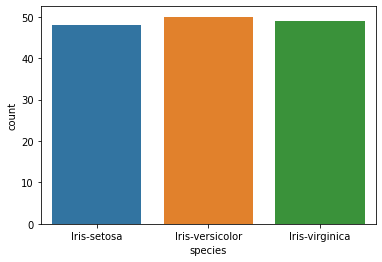

In [10]:
sns.countplot(df["species"])
plt.show()

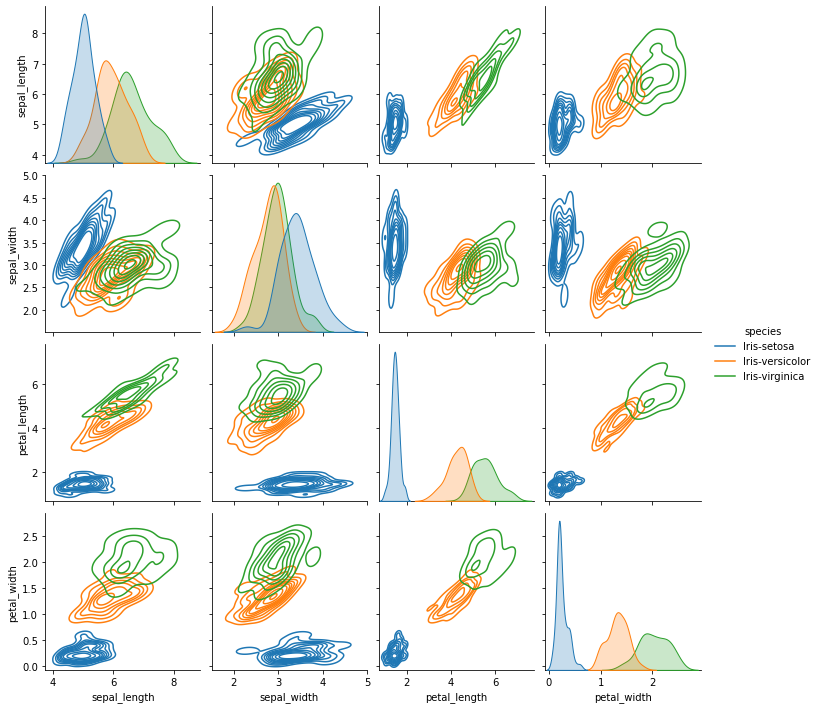

In [11]:
sns.pairplot(df,hue='species',kind='kde')

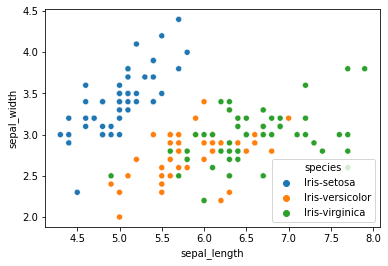

In [12]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

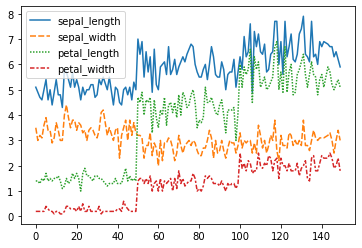

In [13]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

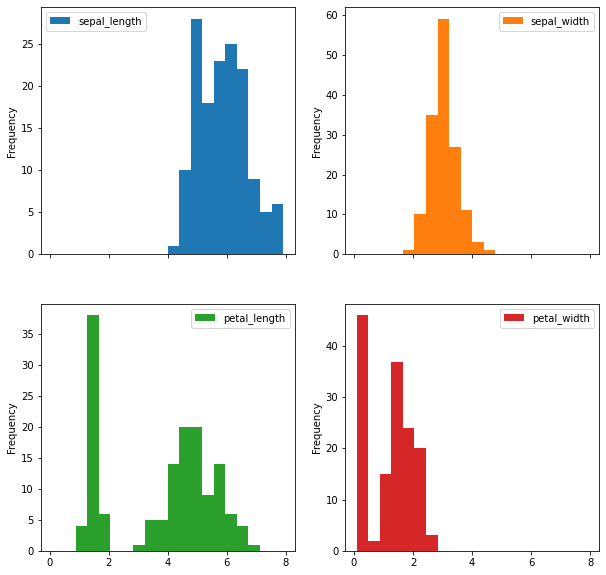

In [14]:
df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()

# Encoding

In [15]:
df['species']=df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'],[0, 1, 2])

C:\Users\DELL\AppData\Local\Temp/ipykernel_62116/4225446532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'],[0, 1, 2])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.0 KB


# spelt data

In [21]:
X = df.drop(['species'],axis=1)
y = df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 42)

# modeling

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Training set score: 0.98
Test set score: 0.97
Accuracy Score: 0.97
Confusion Matrix: 
 [[ 9  1  0]
 [ 0 13  0]
 [ 0  0 14]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        14

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
